In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('diamonds')
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


### Data visualization

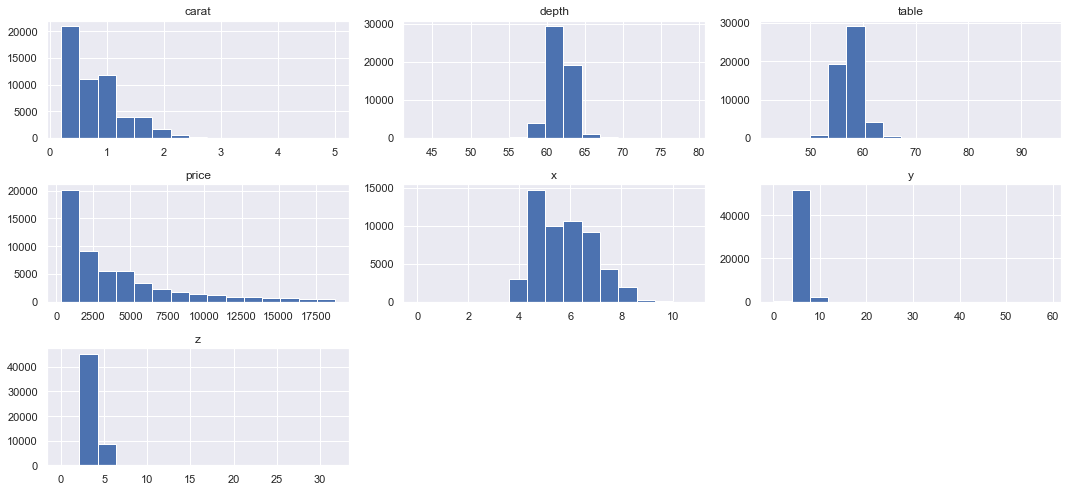

<AxesSubplot:>

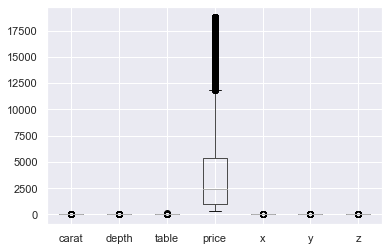

In [2]:
import matplotlib.pyplot as plt

X, y = df.drop(['cut'], axis=1), df['cut']

sns.set(style='darkgrid')
df.hist(bins=15, figsize=(15, 7))

# num_col_names = X.select_dtypes(include='number').columns

# fig, axs = plt.subplots(2, 4, figsize=(15, 7))
# for i, column in enumerate(num_col_names):
#     row = i // 4
#     col = i % 4
#     ax = axs[row, col]
#     sns.histplot(df[column], bins=15, ax=ax)

plt.tight_layout()
plt.show()

df.boxplot()

### Data preparation

In [3]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

to_scale = ['depth', 'table', 'x', 'y', 'z']
to_log = ['carat', 'price']
category = X.select_dtypes(include='category').columns

scale_pipe = make_pipeline(StandardScaler())
log_pipe = make_pipeline(PowerTransformer())
category_pipe = make_pipeline(OneHotEncoder())

transformer = ColumnTransformer(
    transformers=[
        ('scale', scale_pipe, to_scale),
        ('log_transform', log_pipe, to_log),
        ('oh_encode', category_pipe, category)
    ])
lg_pipe = Pipeline([('prep', transformer), ('logistic_reg', LogisticRegression(solver='liblinear'))])

### Building the model

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

# reset data
X, y = df.drop(['cut'], axis=1), df['cut'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=44)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

_ = lg_pipe.fit(X_train, y_train)
y_pred = lg_pipe.predict_proba(X_test)

auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(f'AUC score is equal to: {auc.round(6)}')

AUC score is equal to: 0.837331


,count,mean,std,min,25%,50%,75%,max
scale__depth,53940.0,-0.0,1.0,-13.088,-0.523,0.035,0.524,12.041
scale__table,53940.0,0.0,1.0,-6.470,-0.652,-0.205,0.690,16.802
scale__x,53940.0,0.0,1.0,-5.109,-0.910,-0.028,0.721,4.465
scale__y,53940.0,-0.0,1.0,-5.021,-0.888,-0.021,0.705,46.550
scale__z,53940.0,-0.0,1.0,-5.015,-0.891,-0.012,0.710,40.048
log_transform__carat,53940.0,0.0,1.0,-1.872,-0.920,0.046,0.763,2.837
log_transform__price,53940.0,-0.0,1.0,-2.078,-0.914,0.031,0.797,1.931


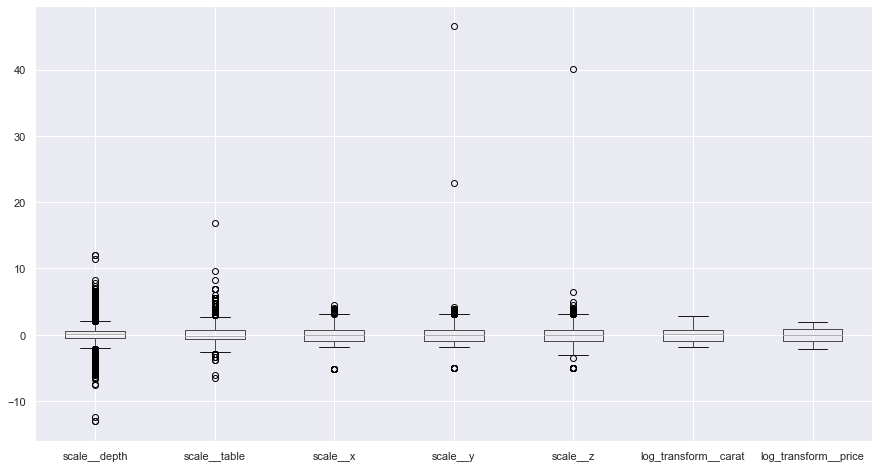

In [5]:
df_norm = pd.DataFrame(transformer.fit_transform(df), columns=transformer.get_feature_names_out()).iloc[:, 0:7]
df_norm.boxplot(figsize=(15,8))

df_norm.describe().T.round(3)